In [15]:
import pandas as pd 
import numpy as np
import yfinance as yf

from lppy import locproj
from matplotlib import pyplot as plt

#Working to replicate research on monetary policy shocks using the following data
#https://www.michaeldbauer.com/publication/mps/

pull_data = 0
if pull_data:   
    df = pd.read_excel('https://www.michaeldbauer.com/files/FOMC_Bauer_Swanson.xlsx',sheet_name='Monthly SVAR Data',index_col=0)
    df.to_csv('monpolshocksDB.csv')
else:
    pd.read_csv('monpolshocksDB.csv')

In [16]:
# Define the ticker list
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
data = yf.download(tickers_list,'1990-1-1')['Adj Close']
# Print first 5 rows of the data
print(data.head())



[*********************100%***********************]  6 of 6 completed
                AAPL       AXP         BA        IBM        MU       WMT
Date                                                                    
1990-01-02  0.264482  5.069037  11.043630  10.509354  0.970745  3.667142
1990-01-03  0.266257  5.123540  11.312983  10.603185  0.995014  3.667142
1990-01-04  0.267145  5.069037  11.268092  10.723836  0.982879  3.647691
1990-01-05  0.268033  5.014531  11.110966  10.697021  0.958611  3.608778
1990-01-08  0.269808  4.978189  11.245643  10.764043  0.946477  3.657416


In [17]:
df_lp = data.merge(df, left_index = True, right_index = True, how='left')
df_lp['MPS'] = df_lp['MPS'].fillna(0)


/var/folders/3_/4hp02k9s28l0xngsnvfp3jl40000gn/T/ipykernel_69296/965910215.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[varname] = 100*df[var].pct_change(pct_int)
/var/folders/3_/4hp02k9s28l0xngsnvfp3jl40000gn/T/ipykernel_69296/965910215.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[lagname] = 100*df[varname].copy().shift(lag)
/var/folders/3_/4hp02k9s28l0xngsnvfp3jl40000gn/T/ipykernel_69296/965910215.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

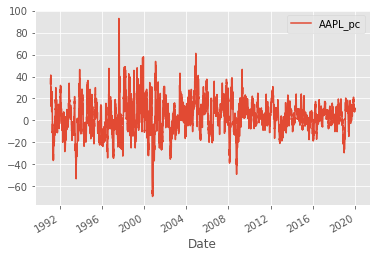

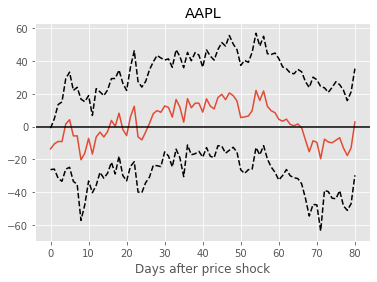

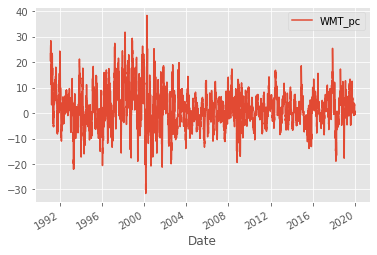

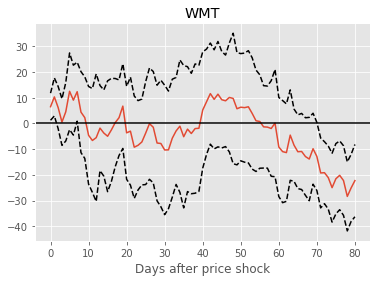

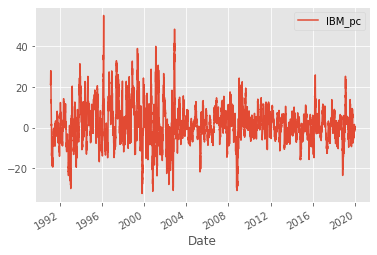

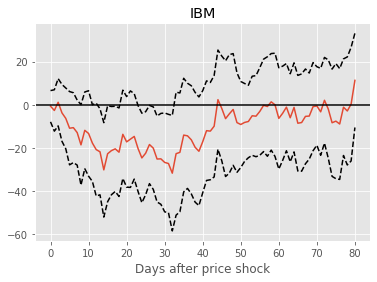

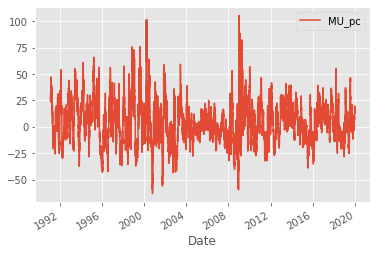

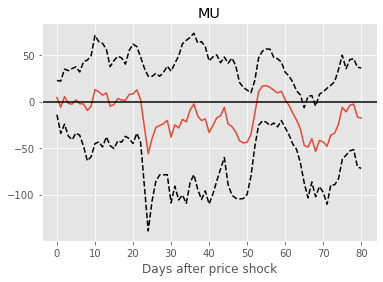

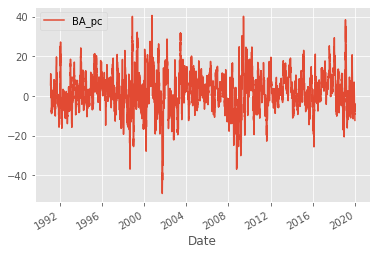

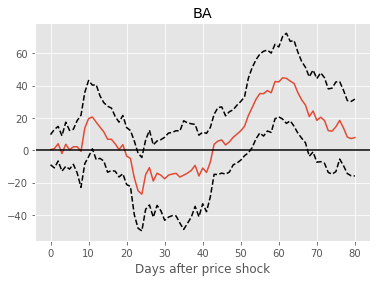

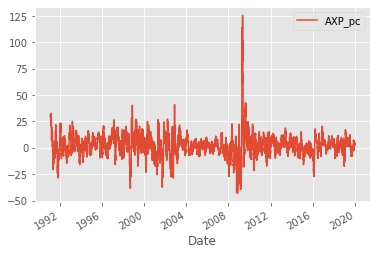

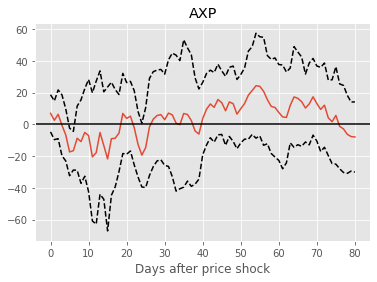

In [26]:
#plot the variables & generate percentage changes & lags 
plt.style.use('ggplot')
control_lag = 5
pct_int = 30 
cut = control_lag+pct_int
for var in tickers_list:   
    reg_list = ['MPS']
    varname = f'{var}_pc'
    df[varname] = 100*df[var].pct_change(pct_int)
    df.plot(y=varname, use_index=True, kind='line')
  
    for lag in range(1,control_lag):
        lagname = f'{var}_L{lag}'
        df[lagname] = 100*df[varname].copy().shift(lag)
        reg_list.append(lagname)
        
    #Run the analysis 
    Y = df[varname].copy().to_numpy()[cut:]
    X = df[reg_list].copy().to_numpy()[cut:]
    irf = locproj(X,Y,0,80,90)
    
    #Plot the results
    plt.figure()
    plt.plot(irf.resp)
    plt.plot(irf.se_low,'k--')
    plt.plot(irf.se_high,'k--')
    plt.xlabel('Days after price shock')
    plt.axhline(y = 0, color = 'black', linestyle = '-')
    plt.title(var)  


        
        
